# Baseline Model: GAN

We implemented a GAN, however, GANs can only be successful with 100k+ images in the training dataset, so we see that it underperforms when only given 6 images.

The code was adapted by our team based on the following source codes:
- Swanrkar, S. (2019). *Image Generator* [Computer software]. MIT License. https://github.com/shivamswarnkar/Image-Generator
- Kedamsetti, M. (2023, July 14). *Implementing DCGAN in PyTorch using the CelebA Dataset: A Comprehensive Guide*. https://medium.com/@manoharmanok/implementing-dcgan-in-pytorch-using-the-celeba-dataset-a-comprehensive-guide-660e6e8e29d2

We ran this code in Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Packages and Install GAN libraries

In [ ]:
import numpy as np

from tqdm.auto import trange, tqdm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [ ]:
!git clone https://github.com/shivamswarnkar/Image-Generator.git gan
%cd gan

fatal: destination path 'gan' already exists and is not an empty directory.
/content/gan


In [ ]:
# setup dataroot
!mkdir -p data/landmark/Images

In [ ]:
# list files in data/landmark
!ls data/landmark

Images


### Change Directory /data/ to where your images are located

In [ ]:
# copy images from /data/ to data/landmark/
!cp /data/*.jpg data/landmark/Images

In [ ]:
# list files in data/landmark
!ls data/landmark/Images

illu1.jpg  illu2.jpg  illu3.jpg  illu4.jpg  illu5.jpg  illu6.jpg


In [ ]:
!python train.py --dataroot data/landmark/ --num_epochs 5

Starting Training Loop....
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
[1/5][1/1]							Loss_D:1.9411							Loss_G:4.3884							D(x):0.2548							D(G(z)):0.3088/0.0171
Made a New Checkpoint for 1
[2/5][1/1]							Loss_D:0.6153							Loss_G:8.0462							D(x):1.0000							D(G(z)):0.4233/0.0006
[3/5][1/1]							Loss_D:0.5309							Loss_G:8.3897							D(x):1.0000							D(G(z)):0.4036/0.0005
[4/5][1/1]							Loss_D:0.0576							Loss_G:6.7299							D(x):1.0000							D(G(z)):0.0554/0.0014
[5/5][1/1]							Loss_D:0.0452							Loss_G:6.4487							D(x):1.0000							D(G(z)):0.0425/0.0022
Saved Final model at checkpoints/netG.pth & checkpoints/netD.pth


In [ ]:
!python generate.py --netG checkpoints/netG.pth

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

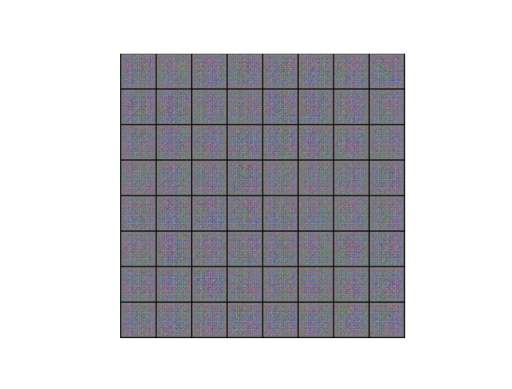

In [ ]:
output = Image.open('output/fake.png')
plt.imshow(output)
plt.axis("off")
plt.show()

### Start Full Training

In [ ]:
!python train.py --dataroot data/landmark/ --netG checkpoints/netG.pth --netD checkpoints/netD.pth --num_epochs 30

Starting Training Loop....
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
[1/50][1/1]							Loss_D:0.1300							Loss_G:13.0944							D(x):1.0000							D(G(z)):0.1127/0.0001
Made a New Checkpoint for 1
[2/50][1/1]							Loss_D:0.0102							Loss_G:10.0605							D(x):1.0000							D(G(z)):0.0100/0.0001
[3/50][1/1]							Loss_D:0.0009							Loss_G:8.9271							D(x):1.0000							D(G(z)):0.0009/0.0001
[4/50][1/1]							Loss_D:0.0090							Loss_G:9.0541							D(x):1.0000							D(G(z)):0.0088/0.0002
[5/50][1/1]							Loss_D:0.0069							Loss_G:8.6804							D(x):1.0000							D(G(z)):0.0068/0.0002
[6/50][1/1]							Loss_D:0.0940							Loss_G:12.6563							D(x):0.9999							D(G(z)):0.0825/0.0000
Made a New Checkpoint for 6
[7/50][1/1]							Loss_D:0.0022							Loss_G:9.6293							D(x):0.9994							D(G(z)):0.0016/0.0

In [ ]:
!python generate.py --netG checkpoints/netG.pth

### Display Outputs from GAN Model

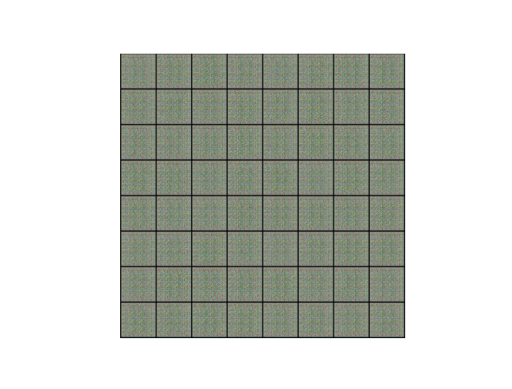

In [ ]:
output = Image.open('output/fake.png')
plt.imshow(output)
plt.axis("off")
plt.show()